In [1]:
from cpclasses import *

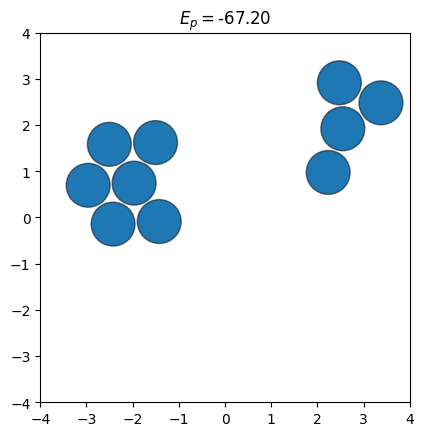

In [87]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=10)


relax(cluster, steps=1009, tol = 0.005)

fig, ax = plt.subplots()

ax.set(xlim=(-4, 4), ylim=(-4,4), aspect='equal')

cluster.draw(ax, size=1000)

[(0.7, 2.0), (-5.0, 1.0)]

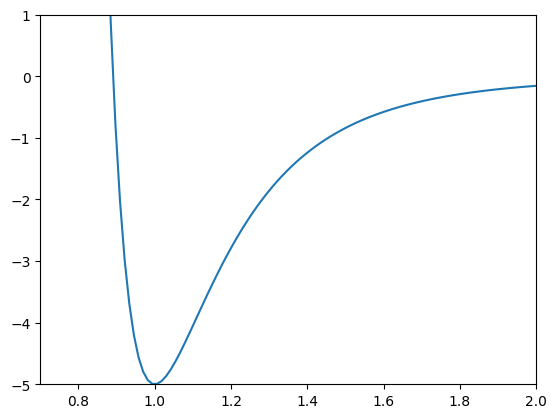

In [157]:
fig, ax = plt.subplots()

xs = np.linspace(0.8, 2, 100)

ax.plot(xs, LJ._V(xs))
ax.set(xlim=(0.7, 2), ylim=(-5, 1))

In [274]:


def nvt_thermostat(md):
    
    m = 1  # atomic mass (assuming m = 1 for simplicity)
    velocities = md.get_velocities()

    v = np.random.randn(*velocities.shape)

    v = v - np.mean(v, axis=0)

    v = (3 * velocities.shape[0]*md.kT/np.sum(v**2)) * v


    return v


def nvt_thermostat_low_dimension(cluster, m = 1):


    std = np.sqrt(cluster.kT/m)

    velocities = cluster.get_velocities()

    v = np.random.standard_normal(velocities.shape)

    

    v = v*std

    cluster.set_velocities(v)

    return v



nvt_thermostat_low_dimension(cluster)


array([[-0.12586439,  0.0087057 ],
       [ 0.13751579, -0.41991022],
       [-0.19406053,  0.24183915]])

In [46]:
LJ = LennardJones()
cluster = AtomicCluster(calc = LJ,N=3)


relax(cluster, steps=1000, tol = 1e-6)

print(cluster.potential_energy + cluster.kinetic_energy)
nvt_thermostat(cluster)

velocity_verlet(cluster, N = 50, dt=0.01)
print(cluster.potential_energy + cluster.kinetic_energy)

-5.0025037084210675
-4.688233432470058


In [242]:
kT = 0.05

cluster = AtomicCluster(calc = LJ,N=3, kT=kT)
relax(cluster, steps=1000, tol = 1e-6)
energies = []
for _ in range(1000):
    velocity_verlet(cluster, N = 50, dt=0.001)
    nvt_thermostat(cluster)
    
    energy = cluster.potential_energy + cluster.kinetic_energy
    #print(energy)
    energies.append(energy)


In [48]:
print(energies)

[-4.743664922526445, -4.855762390229371, -4.8486735941984485, -4.86925529773488, -4.874976987155388, 0.2843141609126533, 0.06459404443011989, 0.23061972534438246, 0.11880626222978749, 0.11732352197343615, -0.12361544283443396, -2.004356100321486, -2.8538572498478927, 0.12386927545010837, -0.2444705105002204, -4.7838824636924, -4.8787476482779955, -4.9299614133251035, -4.756935313229061, -4.8947369038327855, -4.916619073660174, -4.651004826872493, -4.698227447687083, -4.755596316380926, -4.811033220103475, -4.858869590866614, -4.683087829781624, -4.69800815223113, -4.738445223686053, -4.895206823898178, -4.814781507862171, -4.884392174756947, -4.7439690505156875, -4.925460328525194, -4.818192107011618, 0.054911975319495564, 0.0988245936547167, 0.05759749362706686, 0.1631075283386388, 0.33467650077164013, 0.15495643302499923, 0.025296022937979876, 0.3708718216307662, 0.15725639804135422, 0.19764143319727098, 0.16452981567293323, 0.15484630347832012, 0.16502072170335835, 0.412364715978756

In [278]:
for kT in kTs:

    cluster.kT = kT

    nvt_thermostat_low_dimension(cluster)

    print(cluster.velocities)
    print(cluster.kinetic_energy)
    print('')

[[-0.35219542  0.23633396]
 [ 0.04052552 -0.29844892]
 [ 0.18836365  0.20185581]]
0.17341803314939486

[[ 0.03267717  0.47116744]
 [ 0.12630191 -0.2528167 ]
 [-0.28711315  0.05905647]]
0.19442831611247932

[[ 0.91354866  0.65141385]
 [ 0.19752788 -1.09689537]
 [ 0.18578208  0.18649493]]
1.285201608982447

[[ 0.56684932  0.32028141]
 [ 0.62608184 -0.62064537]
 [ 0.29931605  0.17360107]]
0.660402455091909

[[-0.09156157 -0.60058946]
 [-0.91912269 -0.66594135]
 [ 0.37740717 -1.60746699]]
2.1918709633064015

[[ 1.05865708 -0.55306521]
 [ 0.06913546  1.82879332]
 [-0.08405507 -0.18350126]]
2.408319323403796

[[ 1.07313368 -0.8112972 ]
 [-1.69048553  0.42820549]
 [-2.30063207 -0.57322422]]
5.236207119315704

[[0.69306492 0.54867711]
 [0.28000222 0.83667942]
 [0.41071762 0.5054448 ]]
0.9919913266836506

[[ 1.95194192 -0.53019911]
 [-0.61356289 -0.44795933]
 [ 1.26561715 -0.00985026]]
3.1350995720751156

[[-1.80560978 -0.14908441]
 [-2.10352938  0.5916637 ]
 [ 2.62578376 -1.10387745]]
8.085320

[(-15.0, 10.0)]

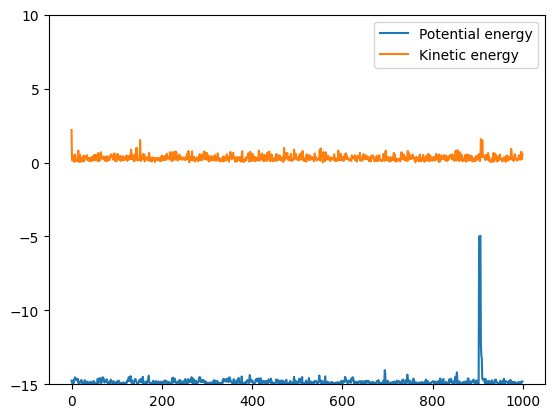

In [275]:
def simulate(cluster, steps=1000, dt=0.01):
    potential_energies = []
    kinetic_energies = []
    positions = []
    #relax(cluster, steps=1000, tol = 1e-6)
    
    for _ in range(steps):
        nvt_thermostat_low_dimension(cluster)
        velocity_verlet(cluster, N = 50, dt=0.01)
        
        potential_energies.append(cluster.potential_energy)
        kinetic_energies.append(cluster.kinetic_energy)
        positions.append(cluster.get_positions())
    return potential_energies, kinetic_energies, positions


pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
cluster = AtomicCluster(calc = LJ,pos = pos, kT=0.1)

pot_energies, kinetic_energies, positions = simulate(cluster, steps=1000, dt=0.001)


fig, ax = plt.subplots()
ax.plot(pot_energies, label='Potential energy')
ax.plot(kinetic_energies, label='Kinetic energy')

ax.legend()
ax.set(ylim=(-15, 10))

[(-5.0, 5.0), (-5.0, 5.0), None]

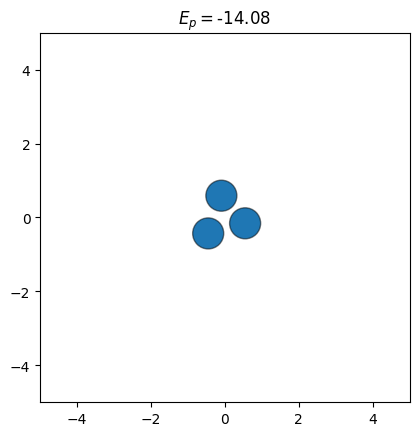

In [265]:
fig, ax = plt.subplots()
cluster.pos

cluster.draw(ax, size=500, center=True)

ax.set(xlim=(-5,5), ylim=(-5,5), aspect='equal')

In [183]:
kTs = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
energies_all = []
positions_all = []

for kT in kTs:
    cluster = AtomicCluster(calc = LJ,pos = pos, kT=kT)
    energies, positions = simulate(cluster, steps=100, dt=0.01)
    energies_all.append(energies)
    positions_all.append(positions)
    print(cluster.kT)



0.05
0.1
0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0


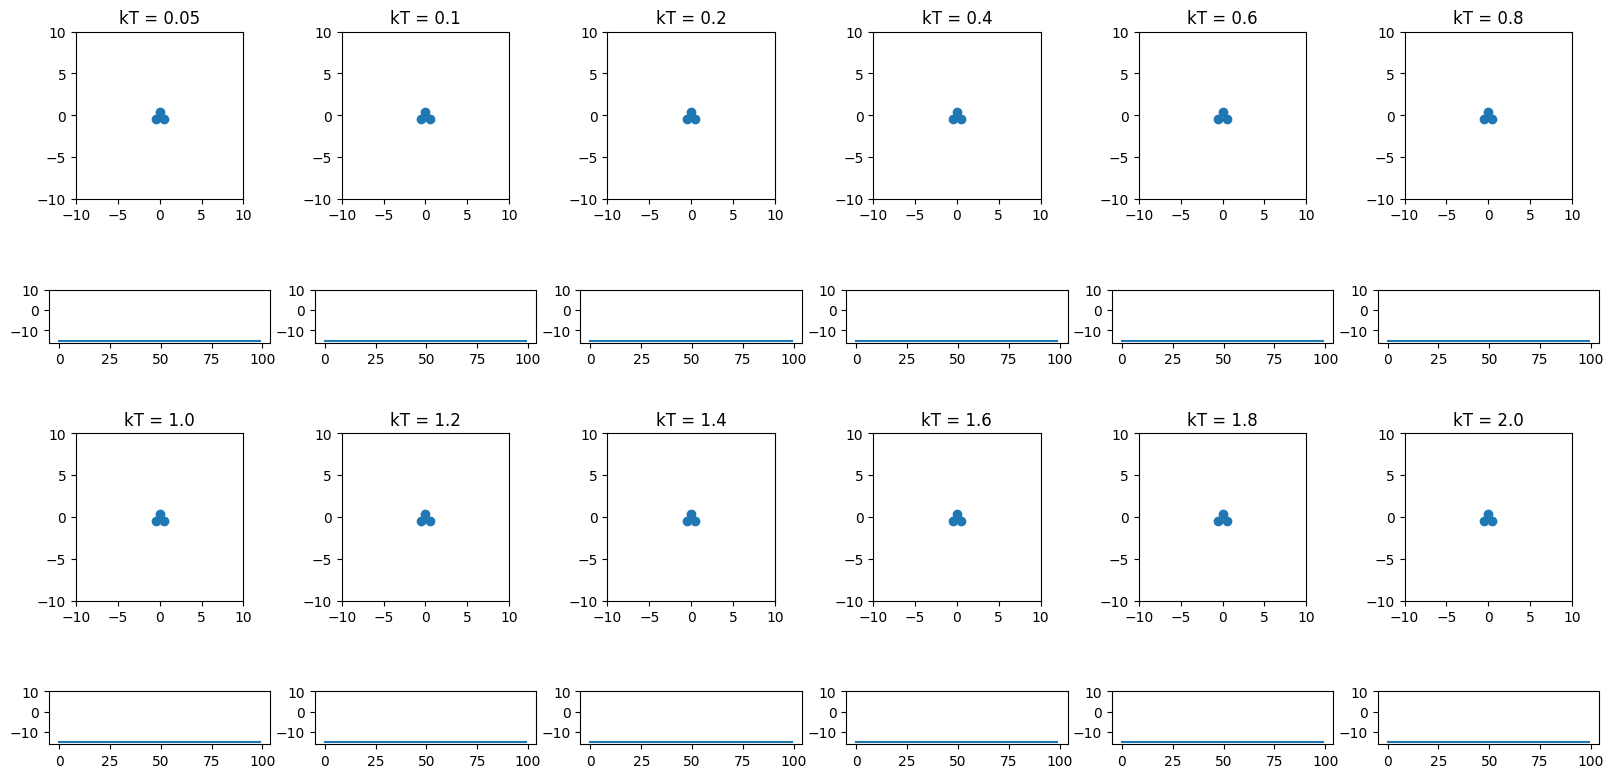

In [188]:
fig, axs = plt.subplots(4,6, figsize=(20,10))

#Plot energies in the second and fourth row
for i, energy, position in zip(range(12), energies_all, positions_all):
    axs[i//6 * 2, i%6].set_title(f"kT = {kTs[i]}")
    axs[i//6 * 2, i%6].scatter(position[-1][:,0], position[-1][:,1])
    axs[i//6 * 2, i%6].set(xlim=(-10, 10), ylim=(-10,10), aspect='equal')
    
    axs[i//6 * 2 + 1, i%6].plot(energy)
    axs[i//6 * 2 + 1, i%6].set( ylim=(-16, 10))
    axs[i//6 * 2 + 1, i%6].set_aspect(



In [50]:


def update(j):
    for i in range(6):


        cluster = clusters[i]
        relax(cluster, steps=100, tol = 1e-5)
        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
        energies[i].append(energy)
        
        if j%10 == 0:
        
            # Top row (molecule structure)
            ax1 = axes[i]  # Access the i-th subplot
            cluster.draw(ax1, size=200, center=True)
            ax1.set_xlim(-5, 5)
            ax1.set_ylim(-5, 5)
            ax1.set_title(f'kT = {kTs[i]:.3f}')
            ax1.set_aspect('equal')
            ax1.grid(True)

            # Second row (energies for the molecule)
            ax2 = axes[i + 6]  # Access the subplot in the second row
            ax2.clear()
            ax2.plot(np.arange(len(energies[i])), energies[i], color="purple", lw=0.8)
            ax2.set_xlim(0, N)
            ax2.set_ylim(-15, 7)
            ax2.grid(True)

    # Third and Fourth row (repeat for other data sets)
    for i in range(6):
        cluster = clusters[i + 6]
        velocity_verlet(cluster, N = 50, dt=0.01)
        
        nvt_thermostat(cluster)
        energy = cluster.potential_energy + cluster.kinetic_energy
    
        energies[i + 6].append(energy)

        if j%10 == 0:
            # Third row
            ax3 = axes[i + 12]  # Third row
            ax3.clear()
            cluster.draw(ax3, size=100, center=True)
            ax3.set_xlim(-9, 9)
            ax3.set_ylim(-9, 9)
            ax3.set_title(f'kT = {kTs[i+6]:.3f}')
            ax3.set_aspect('equal')
            ax3.grid(True)

            # Fourth row
            ax4 = axes[i + 18]  # Fourth row
            ax4.plot(np.arange(len(energies[i+6])), energies[i+6], color="purple", lw=0.8)
            ax4.set_xlim(0, N)
            ax4.set_ylim(-15, 7)
            ax4.grid(True)

        

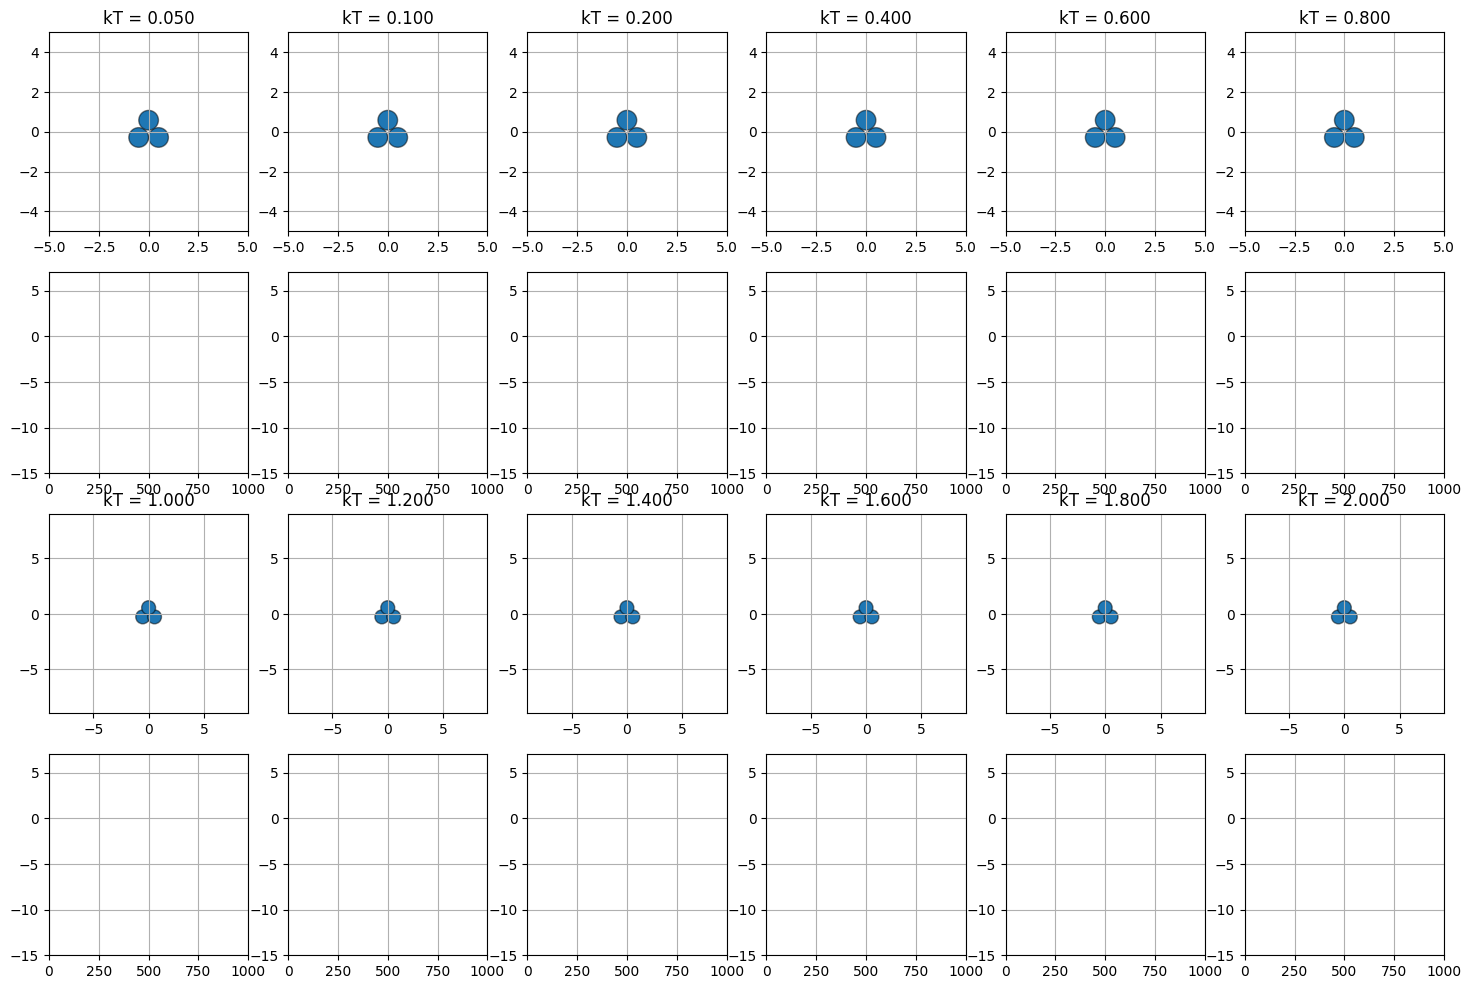

In [51]:
N = 1000
pos = [[-0.5, -0.5], [0.5, -0.5], [0, 0.5]]
clusters = [AtomicCluster(calc = LJ,pos = pos, kT = kT) for kT in kTs]
#for cluster in clusters:
#    relax(cluster, steps=1000, tol = 1e-6)

energies = [[] for _ in range(12)]

fig, axes = plt.subplots(4, 6, figsize=(18, 12))  # 4 rows, 6 columns

# Flatten the axes array for easier indexing
axes = axes.flatten()

update(0)

In [ ]:
from matplotlib.animation import FuncAnimation
plt.rc('animation', html='jshtml')

anim = FuncAnimation(fig, update, frames=1000, repeat=False)

save_animation(anim,'molecular_dynamics.gif', writer='pillow', fps =100)


In [29]:
x = 100

print(x%10)

0
